Using TensorFlow backend.


Feeforwarding through the network
Visualizing all activations


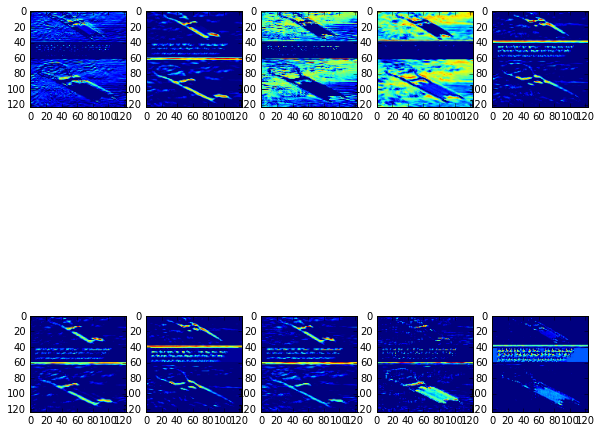

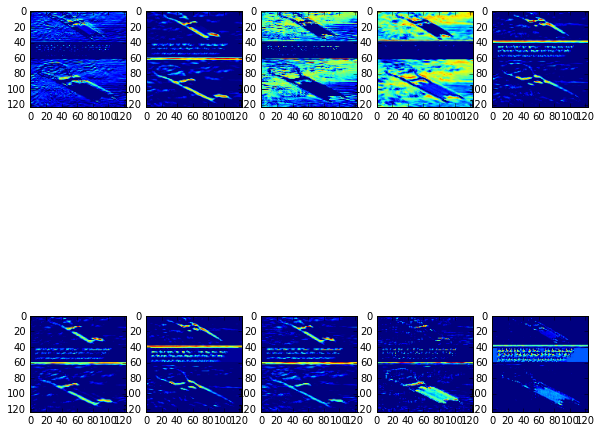

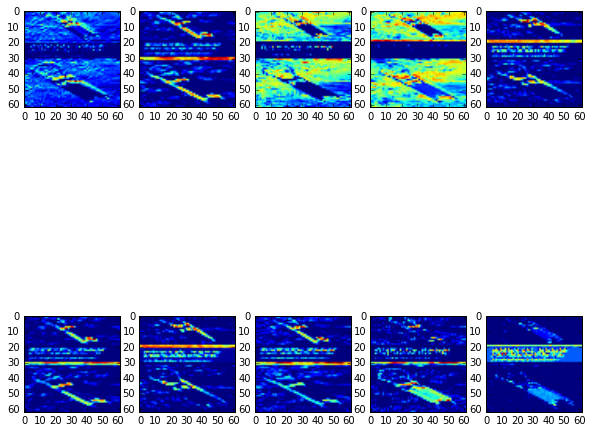

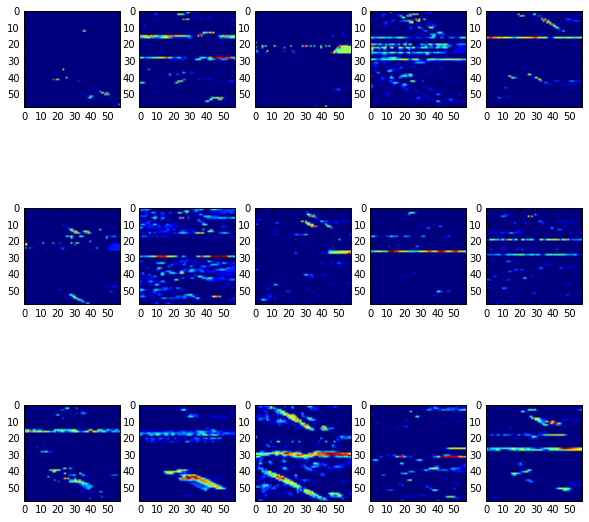

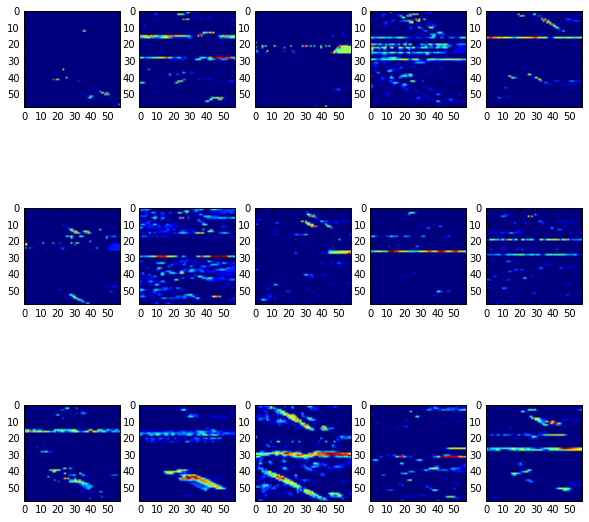

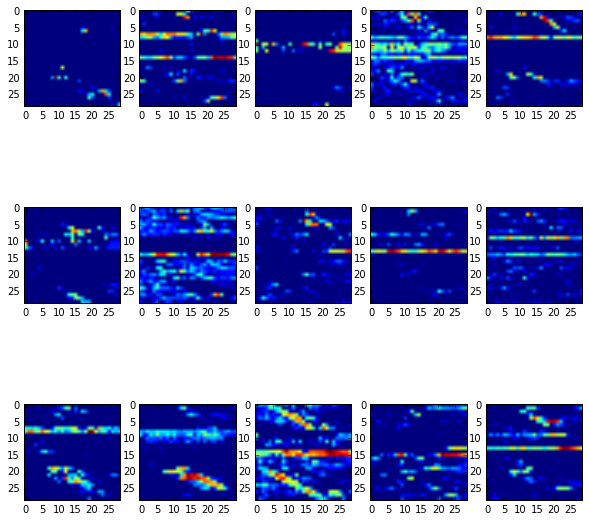

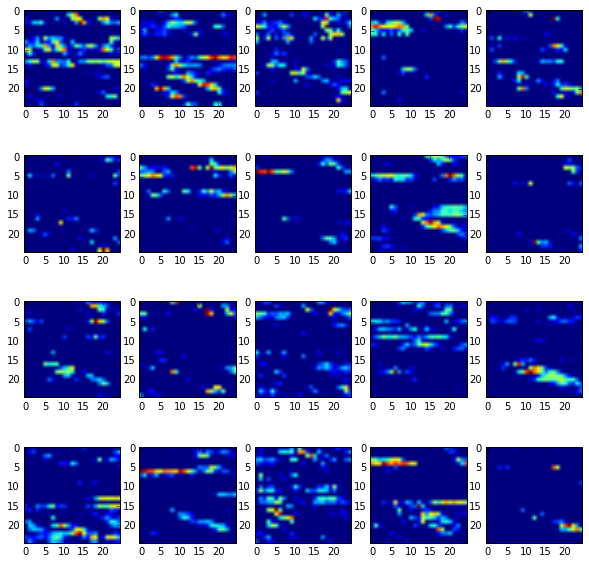

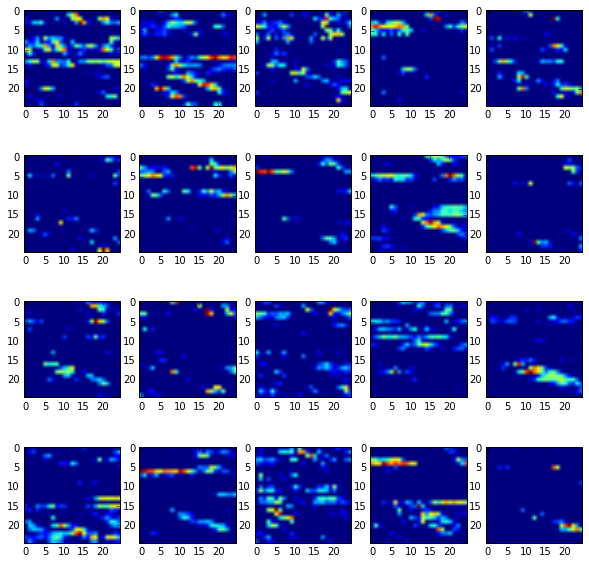

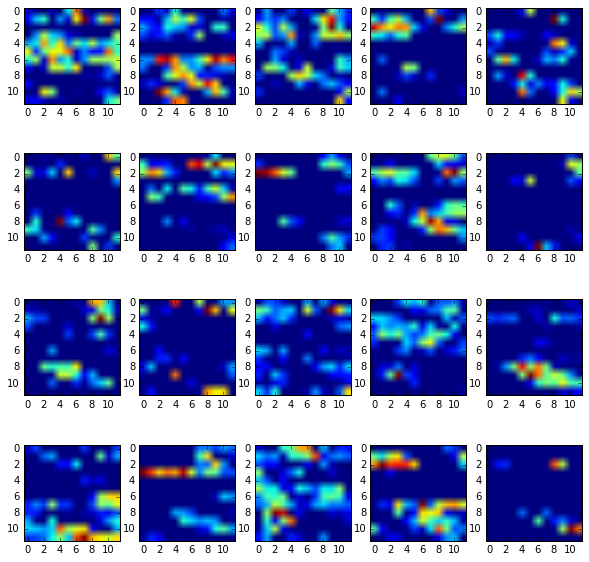

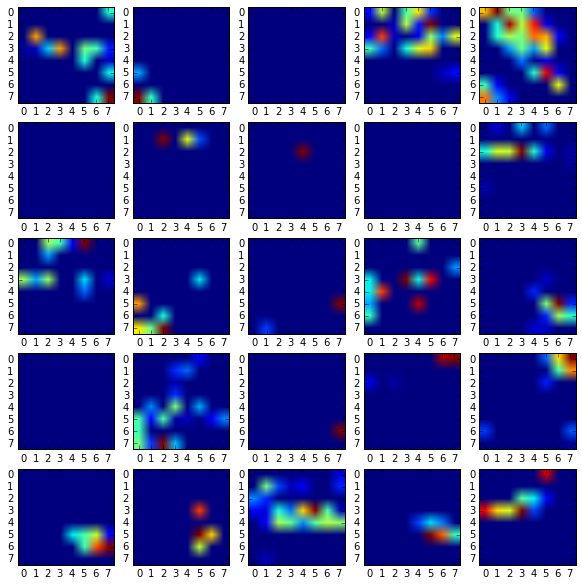

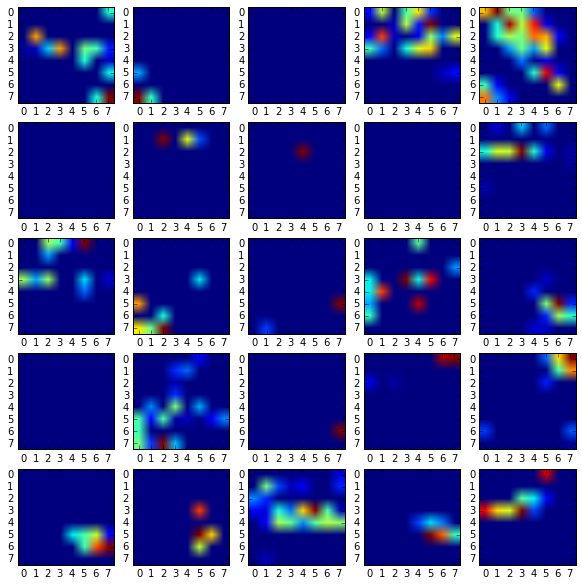

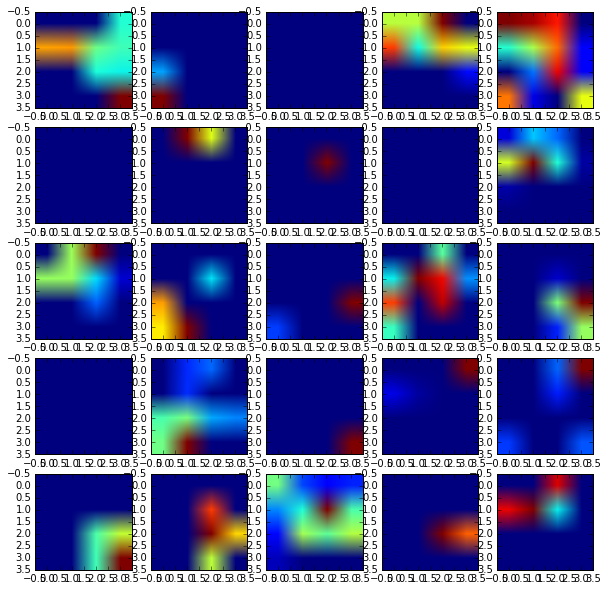

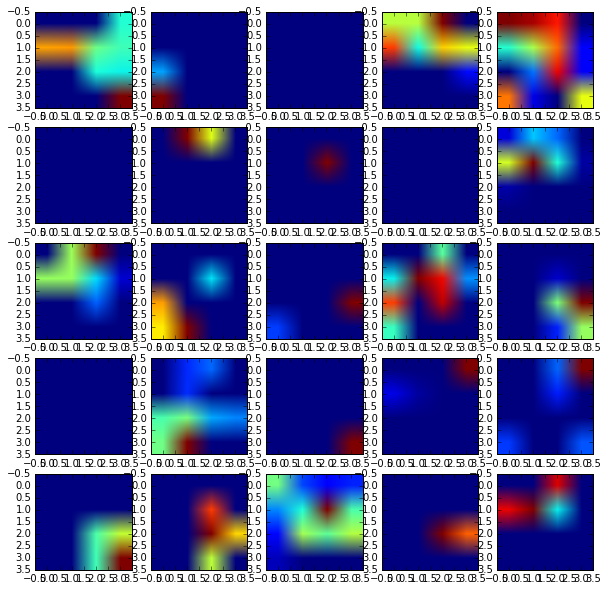

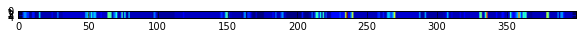

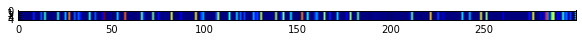

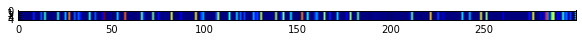

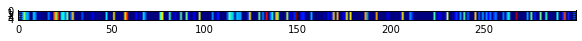

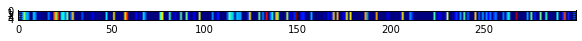

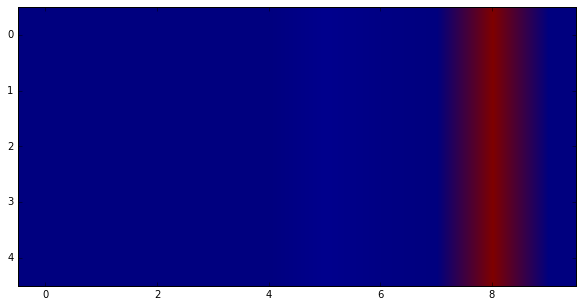

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import h5py
from keras.models import load_model

import pylab
pylab.rcParams['figure.figsize'] = (10, 10)

from unveiler import Model
from metrics import fmeasure, recall, precision

if __name__ == "__main__":
    
    keras_model = load_model('models/model.h5', 
         {'fmeasure': fmeasure, 'recall': recall, 'precision': precision})
    
    with h5py.File('../mixed_data/2017-12-01-10-13-46_3_3_110.h5', 'r') as f:
        frames = f['frames'][:]
        labels = f['labels'][:]
    
    model = Model(keras_model)
 
    start, offset = 42, 1
    for frame in frames[start:start+offset]:
        print('Feeforwarding through the network')
        model.predict(frame)
      
        print('Visualizing all activations')
        model.visualize(until=20, n_cols=5)
       
        #print('Deconvolving first layer')
        #model.deconvolve(index=1)

In [ ]:
import numpy as np
np.where(labels == 9)


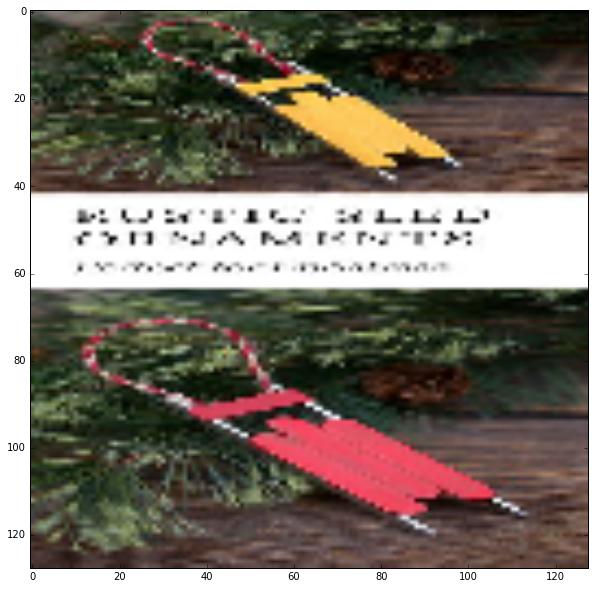

In [12]:
import matplotlib.pyplot as  plt
frame = frames[42][3:6]*128+128
frame = np.uint8(frame)
plt.imshow(frame.transpose((1, 2, 0)))
plt.show()